<a href="https://colab.research.google.com/github/jpxoi/neuralnetwork/blob/main/neuralnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Libraries Import





In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# Dataset Creation

##Variables

In [ ]:
n = 500
p = 2

Consider that:
* n = number of sample data
* p = number of parameters

## Graph Plotting

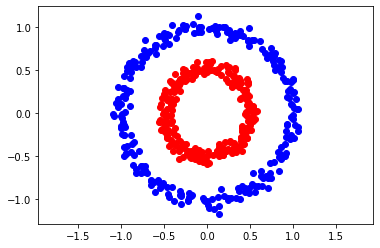

In [ ]:
X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="blue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="red")
plt.axis("equal")
plt.show()

# Neural Network

Neural networks are composed of neurons, which in turn are grouped into layers: each neuron in each layer is connected to all the neurons in the previous layer. In each neuron, a series of operations will be performed which, by optimizing, we will get our network to learn.

### Neural Layers

In order to program a layer of neurons, we must first have a good understanding of how they work. Basically, a neural network works as follows:

1. A layer receives values, called inputs. In the first layer, these values will be defined by the input data, while the other layers will receive the result of the previous layer.
2. A weighted sum of all the input values is performed. To do this weighting we need a matrix of weights, known as W. The matrix W has as many rows as neurons in the previous layer and as many columns as neurons in that layer.
3. To the result of the previous weighted sum we will add another parameter, known as bias or, simply, b. In this case, each neuron has its own bias, so the dimensions of the bias vector will be one column and as many rows as neurons that layer has.
4. Fourth, we have one of the keys to neural networks: the activation function. And, if you notice, what we have so far is nothing more than a linear regression. To avoid that the whole neural network can be reduced to a simple linear regression, a function, known as activation function, is applied to the result of the sum of the bias to the weighted sum. The result of this function will be the output of the neuron.

Therefore, in order to assemble a layer of a neural network we only need to know the number of neurons in the layer and the number of neurons in the previous layer. With that, we will be able to create both W and b.

To create this structure we are going to create a class, which we will call neural_layer. In addition, we will initialize the parameters (b and W) with random data.

In [ ]:
class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f
    self.b = np.random.rand(1, n_neur) * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1

Consider that:

* n_conn = connections number
* n_neur = neurons number
* act_f = activation function

### Activation Functions

As I said before, to the result of the weighted sum of the input and the bias parameter we apply an activation function, that is, a transformation to the data. The reason is that, if we did not do this, each neuron would only do a linear transformation of the data, resulting in a normal linear function.

Which function do we use? We could use any activation function that makes the result non-linear, but generally two are used: sigmoid function and ReLu function.

#### Sigmoid Function

The sigmoid function basically receives a value **x** and returns a value between 0 and 1. This makes it a very interesting function, since it indicates the probability of a state. For example, if we use the sigmoid function in the last layer for a classification problem between two classes, the function will return the probability of group membership.

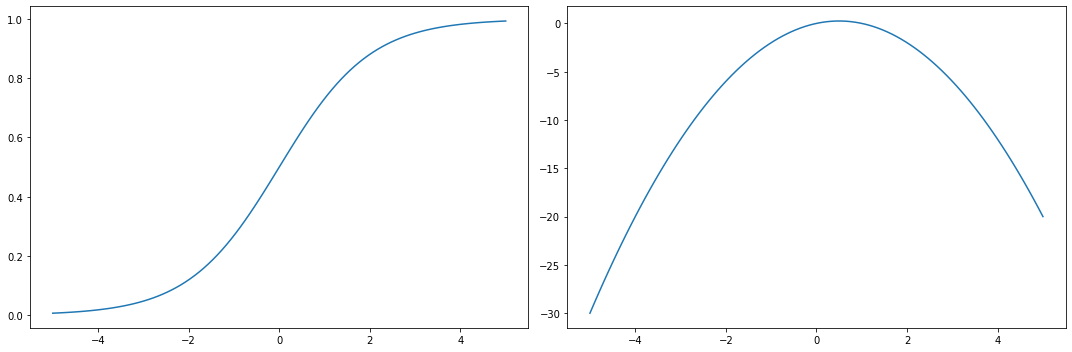

In [ ]:
#Function
sigm = (
  lambda x: 1 / (1 + np.e ** (-x)),
  lambda x: x * (1 - x)
  )

#Variables
rang = np.linspace(-5, 5, 100)
sigm_func = sigm[0](rang)
sigm_derv = sigm[1](rang)

#Graph Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axes[0].plot(rang, sigm_func)
axes[1].plot(rang, sigm_derv)
fig.tight_layout()

#### ReLu Function

The ReLu function is very simple: for negative values, the function returns zero. For positive values, the function returns the same value. But, despite being so simple, this function is the most used activation function in the field of neural networks and deep learning. Why? Precisely because it is simple and because it avoids the gradient vanish.

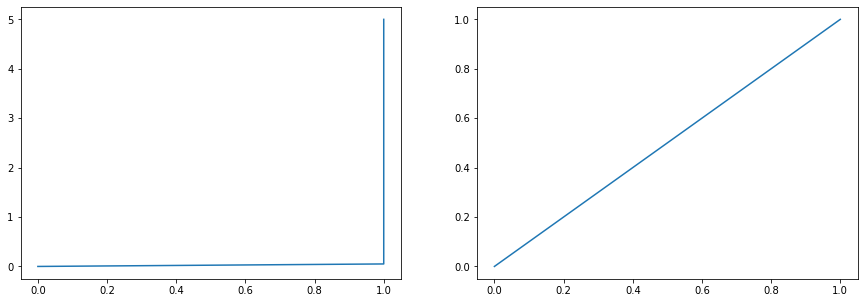

In [ ]:
#Function
def relu_derivate(x):
  x[x<=0] = 0
  x[x>0] = 1
  return x

relu = (
  lambda x: x * (x > 0),
  lambda x: relu_derivate(x)
  )

#Variables
rang = np.linspace(-5, 5, 100)
relu_func = relu[0](rang)
relu_derv = relu[1](rang)

# Graph Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(15,5))
axes[0].plot(rang, relu_func)
axes[1].plot(rang, relu_derv)
plt.show()

### Neural Network

To create a neural network, we will simply have to indicate three things: the number of layers that the network has, the number of neurons in each layer and the activation function that will be used in each of the layers. With that and with what we have programmed so far we can create the structure of our neural network.

In our case, we will use the neural network to solve a two-class classification problem, for which we will use a small, 5-layer network that will be composed of:

* An input layer with two neurons, since we will use two variables/parameters.
* Five hidden layers, two with 4 neurons, and the other with 8.
* An output layer, with a single neuron that will predict the class.

The number of neurons per layer is defined by the variable topology.

Also, we have to define which activation function will be used in each layer. In our case, we will use the sigmoid function in all layers. It is important to remember that in the first layer only data is received, no function or anything else is applied.

On the other hand, Python does not allow us to create a list of functions. Therefore, we have defined the relu and sigmoid functions as hidden functions using lambda.

#### Creation

In [ ]:
def create_nn(topology, act_f):

  nn = []

  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l], topology[l+1], act_f))
  
  return nn

topology = [p, 4, 8, 4, 1]

neural_network = create_nn(topology, sigm)

print(neural_network)

[<__main__.neural_layer object at 0x7fc07fd23250>, <__main__.neural_layer object at 0x7fc07fd233d0>, <__main__.neural_layer object at 0x7fc07fd23190>, <__main__.neural_layer object at 0x7fc07fd1e550>]


With this we already have the structure of our neural network. Now there are only two more steps: on the one hand, connect the network to give us a prediction and an error and, on the other hand, propagate that error backwards to train our neural network.

#### Training

##### Cost Function

In order to train the neural network, the first thing to do is to calculate how much it has failed. To do this we will use one of the most typical estimators in the world of machine learning: the mean squared error (MSE).

Calculating the mean squared error is quite simple: subtract the actual value from each predicted value, square it, do the weighted sum and calculate its root. In addition, as we have done before we will take advantage of this same function to return the derivative of the cost function, which will be useful in the backpropagation step. :

In [ ]:
l2_cost = (
  lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
  lambda Yp, Yr: (Yp - Yr)
)

Now that we have the error calculated, we have to propagate it backwards to adjust the parameters. By doing this iteratively, our neural network will improve its predictions, i.e., its error will decrease. This is how a neural network is trained.

##### Training Process

In [ ]:
def train(neural_network, X, Y, l2_cost, lr=0.5, train=True):

  out = [(None, X)]
  
  #Forward Pass
  for l, layer in enumerate(neural_network):
    z = out[-1][1] @ neural_network[l].W + neural_network[l].b
    a = neural_network[l].act_f[0](z)

    out.append((z, a))

  if train:

    #Backward Pass
    deltas = []

    for l in reversed(range(0, len(neural_network))):
      
      z = out[l+1][0]
      a = out[l+1][1]

      if l == len (neural_network) -1:
        deltas.insert(0, l2_cost[1](a, Y) * neural_network[l].act_f[1](a))
      
      else:
        deltas.insert(0, deltas[0] @ _W.T * neural_network[l].act_f[1](a))

      _W = neural_network[l].W

      #Gradient Descent
      neural_network[l].b = neural_network[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      neural_network[l].W = neural_network[l].W - out[l][1].T @ deltas[0] * lr

  return out[-1][1]

train(neural_network, X, Y, l2_cost, 0.5)


array([[0.64957301],
       [0.65026351],
       [0.64910861],
       [0.64907994],
       [0.64980597],
       [0.65031548],
       [0.64925768],
       [0.64824393],
       [0.64946958],
       [0.64988123],
       [0.64814208],
       [0.64766283],
       [0.64901633],
       [0.65125914],
       [0.64982538],
       [0.65011024],
       [0.64879351],
       [0.64832146],
       [0.65098693],
       [0.64837404],
       [0.65102151],
       [0.64825623],
       [0.64811907],
       [0.64836291],
       [0.64815691],
       [0.64971759],
       [0.64782256],
       [0.64991887],
       [0.6491439 ],
       [0.64806524],
       [0.64778228],
       [0.64898884],
       [0.64948662],
       [0.65096911],
       [0.64836421],
       [0.64844239],
       [0.64879426],
       [0.6473261 ],
       [0.64832549],
       [0.64870901],
       [0.65007217],
       [0.6481867 ],
       [0.64952047],
       [0.64905684],
       [0.6489161 ],
       [0.64763505],
       [0.6499113 ],
       [0.649

###### Forward Pass

For our neural network to predict the only thing we have to do is to define the calculations it has to follow. As I have commented above, there are 3 calculations to follow: multiply the input values by the weight matrix W and add the bias parameter (b) and apply the activation function.

To multiply the input values by the weight matrix we have to do a matrix multiplication.

###### Gradient Descent

With the gradient descent algorithm we will optimize the parameters in order to improve the results of our network. If we go back, we have initialized the parameters randomly. Therefore, it is unlikely that their values are the best for our neural network. Suppose, for example, that our parameters have been initialized in this position.

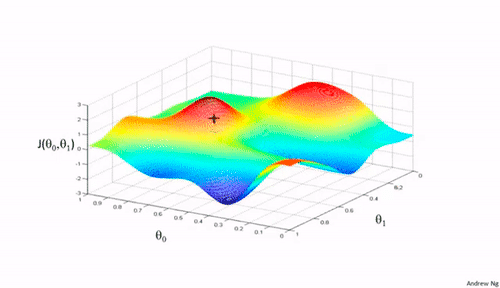

As you can see, the values are far from the optimal value (the dark blue one below), so we should make our parameter reach there. But how do we do it?

To do so, we will use gradient descent. This algorithm uses the error at the point where we are and calculates the partial derivatives at that point. This returns the gradient vector, i.e. a vector of directions in which the error increases. Therefore, if we use the inverse of that value, we will go down. In short, gradient descent calculates the inverse of the gradient to know what values the hyperparameters should take.

How much we move down will depend on another hyperparameter: the learning rate. This hyperparameter is not usually optimized, although two issues must be taken into account:

* If the learning rate value is too low, the algorithm will take too long to learn, because each step will be too short.
* If the learning rate is too high, you may exceed the optimal value, so you will not find the optimal value of the parameters.

To avoid this, several techniques can be applied, such as decreasing the learning rate at each step, for example. In our case, we are not going to complicate and we will leave a fixed learning rate.

With gradient descent at each iteration our parameters will approach an optimal value, until they reach an optimal point, after which our network will stop learning.

This sounds great, but as I said, gradient descent uses the error at the point. We already have this error for our output vector, but what about the rest of the layers? For that, we use backpropagation.

###### Backpropagation

In our neural network all the steps prior to the output neuron will have an impact on it: the error of the first layer will influence the error of the second layer, those of the first and second will influence those of the third and so on.

Therefore, the only way to calculate the error of each neuron in each layer is to do the reverse process: first we calculate the error of the last layer, so we can calculate the error of the previous layer and so on until the whole process is completed.

Moreover, this is an efficient process, since we can take advantage of the backward propagation to adjust the parameters W and b by gradient descent. In any case, to calculate the gradient descent we need to apply derivatives, among which are the derivatives of the cost function. For this very reason, when defining the activation functions we have also defined their derivatives, as this will save us a lot in the process.

Having said that, let's see how gradient descent and backpropagation work. To do this, let's see what are the initial values of our parameters W and b in any layer, such as the last one.

# Runing The Neural Network

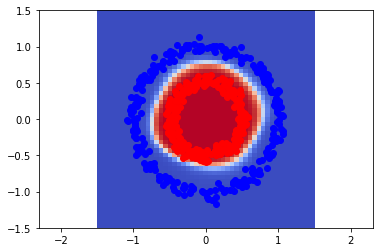

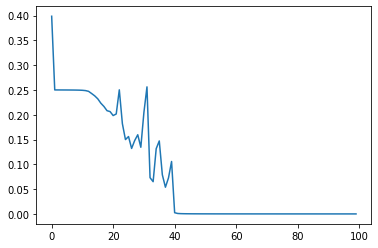

In [ ]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range (2500):

  #Training
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)

  if i % 25 == 0:

    print (pY)

    loss.append (l2_cost[0](pY, Y))

    res = 50
    
    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="blue")
    plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="red")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)